In [1]:
#This notebook is used to create Figure 17 in Reichl et al. 
# as submitted to ESS

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import gsw as gsw
import matplotlib as mpl
from glob import glob
import pickle
Lat='0n'

In [2]:
#Requires running notebook Buoy_Model_PDF_Comparison_Figures
Model = xr.open_dataset('../Data/MOM6Buoy_Outputs.nc')
Model

<xarray.Dataset> Size: 3GB
Dimensions:                (Time_OM4_165e: 35064, Z_OM4_165e: 75,
                            T_OM4_165e: 35064, Zi_OM4_165e: 76,
                            Time_OM4_170w: 35064, Z_OM4_170w: 75,
                            T_OM4_170w: 35064, Zi_OM4_170w: 76,
                            Time_OM4_140w: 35064, Z_OM4_140w: 75,
                            T_OM4_140w: 35064, Zi_OM4_140w: 76,
                            ...
                            Z_OM4up 225_170w: 225, T_OM4up 225_170w: 35064,
                            Zi_OM4up 225_170w: 226, Time_OM4up 225_140w: 35064,
                            Z_OM4up 225_140w: 225, T_OM4up 225_140w: 35064,
                            Zi_OM4up 225_140w: 226, Time_OM4up 225_110w: 35064,
                            Z_OM4up 225_110w: 225, T_OM4up 225_110w: 35064,
                            Zi_OM4up 225_110w: 226)
Coordinates: (12/80)
  * Time_OM4_165e          (Time_OM4_165e) object 281kB 2001-01-01 01:00:00 ....
  * Z_OM4_165e             (Z_OM4_165e) float64 600B 1.0 3.0 ... 6.212e+03
    T_OM4_165e             (T_OM4_165e, Z_OM4_165e) float32 11MB ...
  * Zi_OM4_165e            (Zi_OM4_165e) float64 608B 0.0 2.0 ... 6.5e+03
  * Time_OM4_170w          (Time_OM4_170w) object 281kB 2001-01-01 01:00:00 ....
  * Z_OM4_170w             (Z_OM4_170w) float64 600B 1.0 3.0 ... 6.212e+03
    ...                     ...
    T_OM4up 225_140w       (T_OM4up 225_140w, Z_OM4up 225_140w) float32 32MB ...
  * Zi_OM4up 225_140w      (Zi_OM4up 225_140w) float64 2kB 0.0 2.0 ... 6.5e+03
  * Time_OM4up 225_110w    (Time_OM4up 225_110w) object 281kB 2001-01-01 01:0...
  * Z_OM4up 225_110w       (Z_OM4up 225_110w) float64 2kB 1.0 3.0 ... 6.406e+03
    T_OM4up 225_110w       (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
  * Zi_OM4up 225_110w      (Zi_OM4up 225_110w) float64 2kB 0.0 2.0 ... 6.5e+03
Data variables: (12/160)
    U_OM4_165e             (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    V_OM4_165e             (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    Sx_OM4_165e            (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    Sy_OM4_165e            (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    N2_OM4_165e            (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    Rho0_OM4_165e          (T_OM4_165e, Z_OM4_165e) float32 11MB ...
    ...                     ...
    Sx_OM4up 225_110w      (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
    Sy_OM4up 225_110w      (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
    N2_OM4up 225_110w      (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
    Rho0_OM4up 225_110w    (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
    S_OM4up 225_110w       (T_OM4up 225_110w, Z_OM4up 225_110w) float32 32MB ...
    Kd_OM4up 225_110w      (T_OM4up 225_110w, Zi_OM4up 225_110w) float32 32MB ...

/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183023764.py:39: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
/tmp/ipykernel_1350996/1183

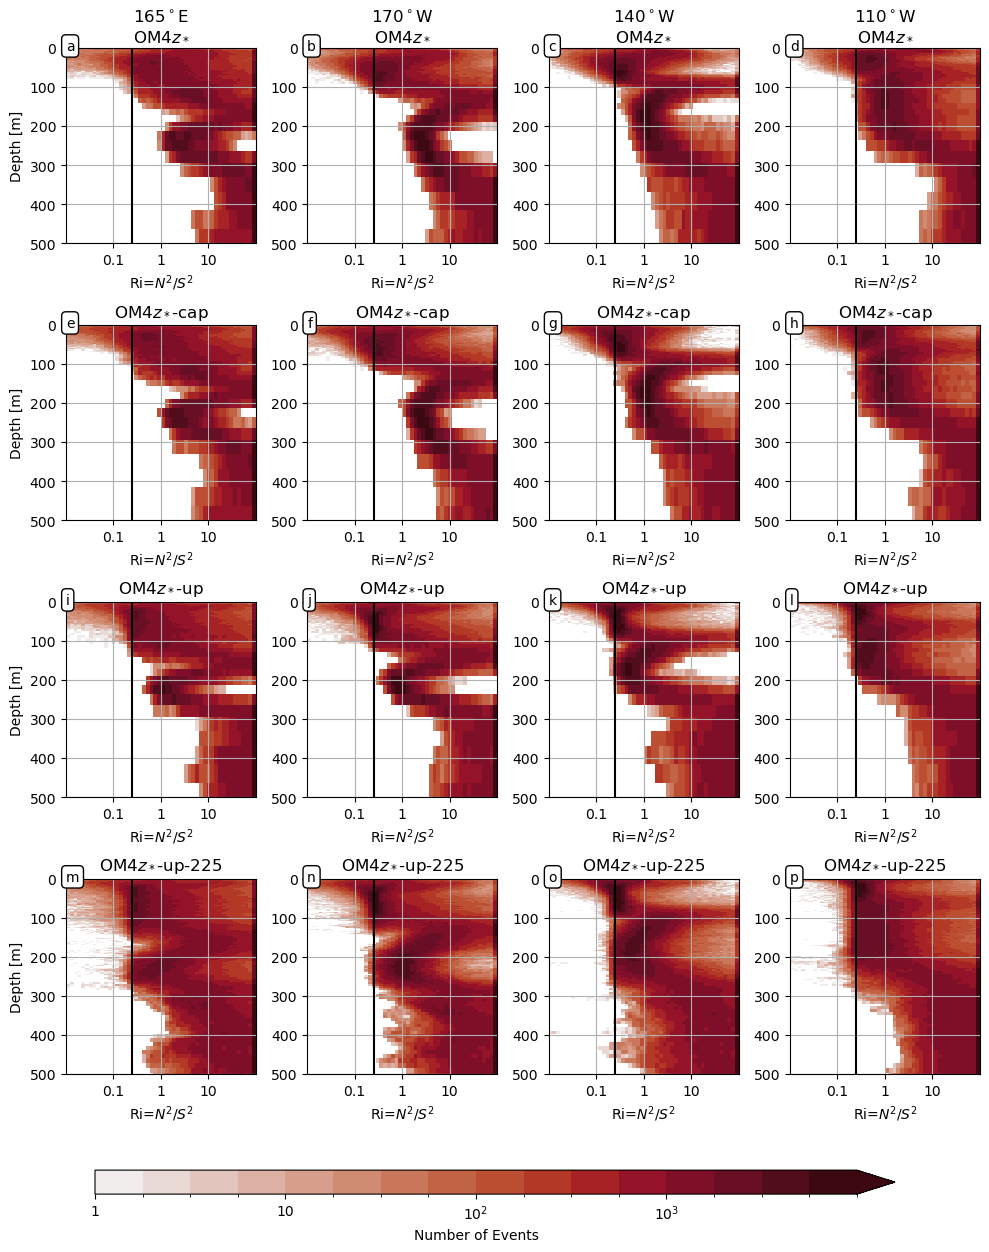

In [21]:
fig,AX=plt.subplots(4,4,figsize=(10,12))
cmap=cmocean.cm.amp
levels=np.linspace(0,4,17)

stnd_bins = np.linspace(-2,2,51)
stnd_bins = 10**stnd_bins

for i,Lon in enumerate(['165e','170w','140w','110w']):
    Lat='0n'
        
    for ip,LBL in enumerate(['OM4','OM4-ePBLcap','OM4up','OM4up 225']):
        if LBL=='OM4':
            TTL='OM4$z_*$'
        elif LBL=='OM4-ePBLcap':
            TTL='OM4$z_*$-cap'
        elif LBL=='OM4up':
            TTL='OM4$z_*$-up'
        elif LBL=='OM4up 225':
            TTL='OM4$z_*$-up-225'
            
        Um=Model['U_'+LBL+'_'+Lon]
        Sx=Model['Sx_'+LBL+'_'+Lon]
        N2=Model['N2_'+LBL+'_'+Lon]
        Zm=Model['Z_'+LBL+'_'+Lon]
        CT = Model['Time_'+LBL+'_'+Lon]

        A = np.zeros([Zm.size,len(stnd_bins)-1])
        for zi in range(Zm.size):
            u=np.minimum(100,np.maximum(N2[:,zi],1.e-10)/np.maximum(Sx[:,zi],1.e-16))
            A[zi,:] = np.histogram((u),stnd_bins)[0]
        DENm = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T
        Zm = Zm.values

        X = 0.5*(stnd_bins[1:]+stnd_bins[:-1])

        ax=AX.ravel()[i+ip*4]


        c=ax.pcolormesh(np.log10(X),Zm,np.log10(A),
                      cmap=cmap,
                      norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                       )
        ax.set_ylim(500,0)
        ax.grid(True)
        if i==0:
            ax.set_ylabel('Depth [m]')
        #axt.set_xticklabels('')
        ax.set_xlabel('Ri=$N^2/S^2$')
        ax.axvline(x=np.log10(0.25),color='k')
        if ip==0:
            ax.set_title(Lon[:-1]+r'$^\circ$'+Lon[-1].upper()+'\n'+TTL)
        else:
            ax.set_title(TTL)
        ax.set(xticks=[-1,0,1],xticklabels=['0.1','1','10'])
        
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.1)
axcb=fig.add_axes([0.1,0.00,0.8,0.02])
cb=plt.colorbar(c,cax=axcb,orientation='horizontal',extend='max')
cb.set_ticks([0,1,2,3])
cb.set_ticklabels(['1','10','10$^2$','10$^3$',])
cb.set_label('Number of Events')

for AXi in range(0,16):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    AX.ravel()[AXi].text(-2,5,txt,bbox=dict(boxstyle='round', facecolor='white'))

fig.savefig('../Fig/RichardsonNumber_Occurences.png',dpi=200,bbox_inches = "tight")
        
